<a href="https://colab.research.google.com/github/MargaritaLomteva/-/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D0%BE_%D1%82%D0%B5%D0%BC%D0%B5_%C2%AB%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B%2C_%D0%BE%D0%B1%D1%89%D0%B0%D1%8F_%D1%82%D0%B5%D0%BE%D1%80%D0%B8%D1%8F_%20%D0%B4%D0%BE%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%D0%BD%D0%BD%D0%BE%D0%B5%C2%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Скачайте материалы к занятию.
Проанализируйте ряды и сделайте их стационарными.
Пришлите решение в виде ссылки на GitHub с ноутбуком.

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [2]:
monthly_sales_of_company_x= pd.read_csv("/content/drive/MyDrive/Знакомство с временными рядами/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("/content/drive/MyDrive/Знакомство с временными рядами/monthly-boston-armed-robberies-j.csv")
airline_passengers = pd.read_csv("/content/drive/MyDrive/Знакомство с временными рядами/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("/content/drive/MyDrive/Знакомство с временными рядами/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("/content/drive/MyDrive/Знакомство с временными рядами/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("/content/drive/MyDrive/Знакомство с временными рядами/daily-total-female-births-in-cal.csv")

In [3]:
airline_passengers.head()

,Month,Count
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
monthly_sales_of_company_x.head()

,Month,Count
0,1965-01,154
1,1965-02,96
2,1965-03,73
3,1965-04,49
4,1965-05,36


In [5]:
robberies_in_boston.head()

,Month,Count
0,1966-01,41
1,1966-02,39
2,1966-03,50
3,1966-04,40
4,1966-05,43


In [6]:
mean_monthly_temp.head()

,Month,Deg
0,1920-01,40.6
1,1920-02,40.8
2,1920-03,44.4
3,1920-04,46.7
4,1920-05,54.1


In [7]:
dowjones_closing.head()

,Week,Close
0,1971-W27,890.19
1,1971-W28,901.80
2,1971-W29,888.51
3,1971-W30,887.78
4,1971-W31,858.43


In [8]:
female_births.head()

,Date,Count
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
all_series = {
    "Monthly sales of company x": monthly_sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airline_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

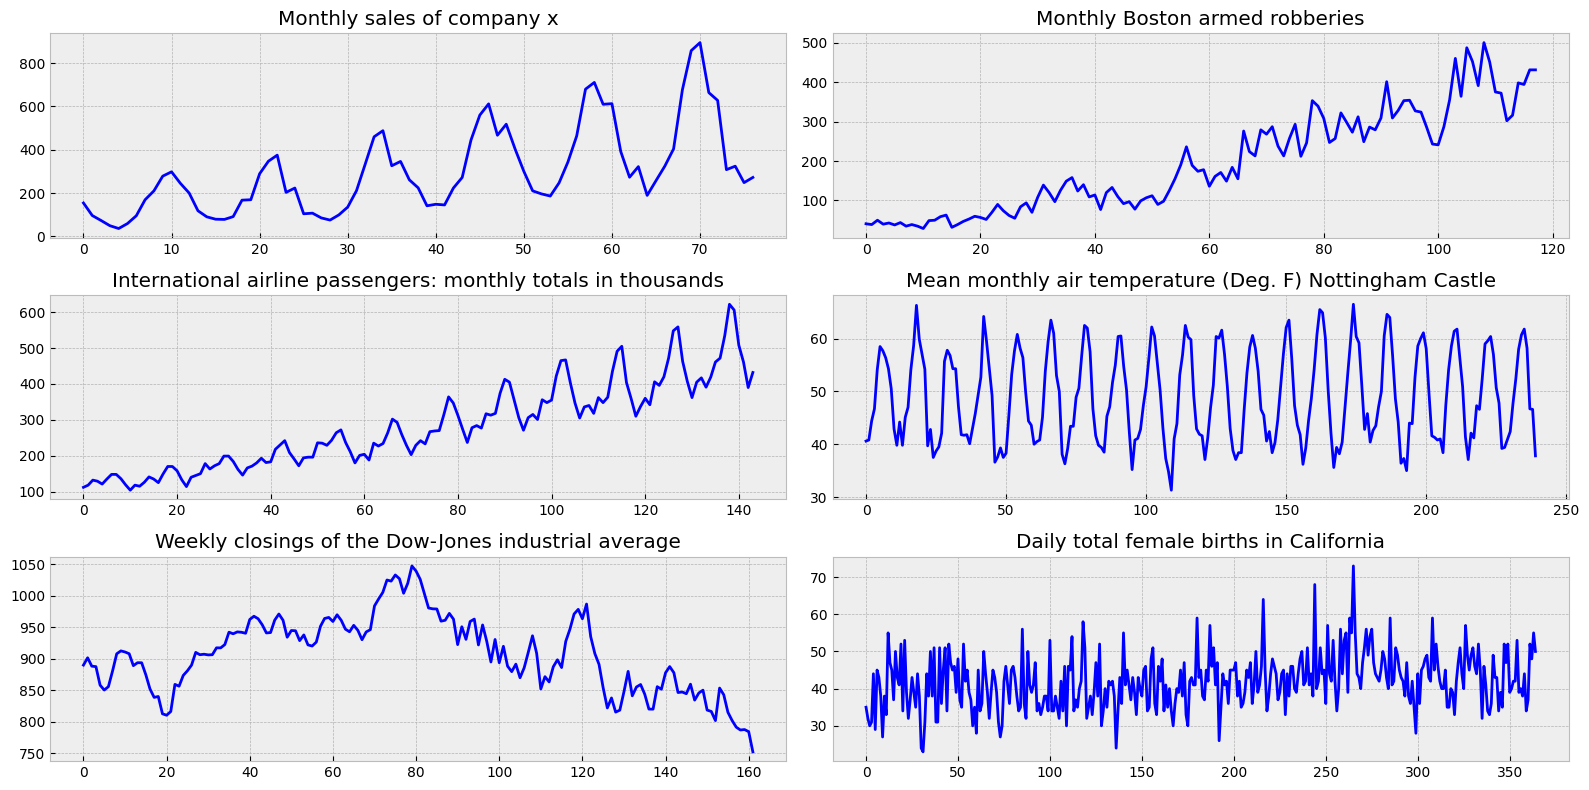

In [11]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)

    plt.tight_layout()

In [12]:
def plot_ts_and_points(ts, start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)

    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')

In [13]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [14]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

international-airline-passengers

In [144]:
test_stationarity(all_series["International airline passengers: monthly totals in thousands"])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [145]:
series = pd.read_csv("/content/drive/MyDrive/Знакомство с временными рядами/international-airline-passengers.csv")['Count']

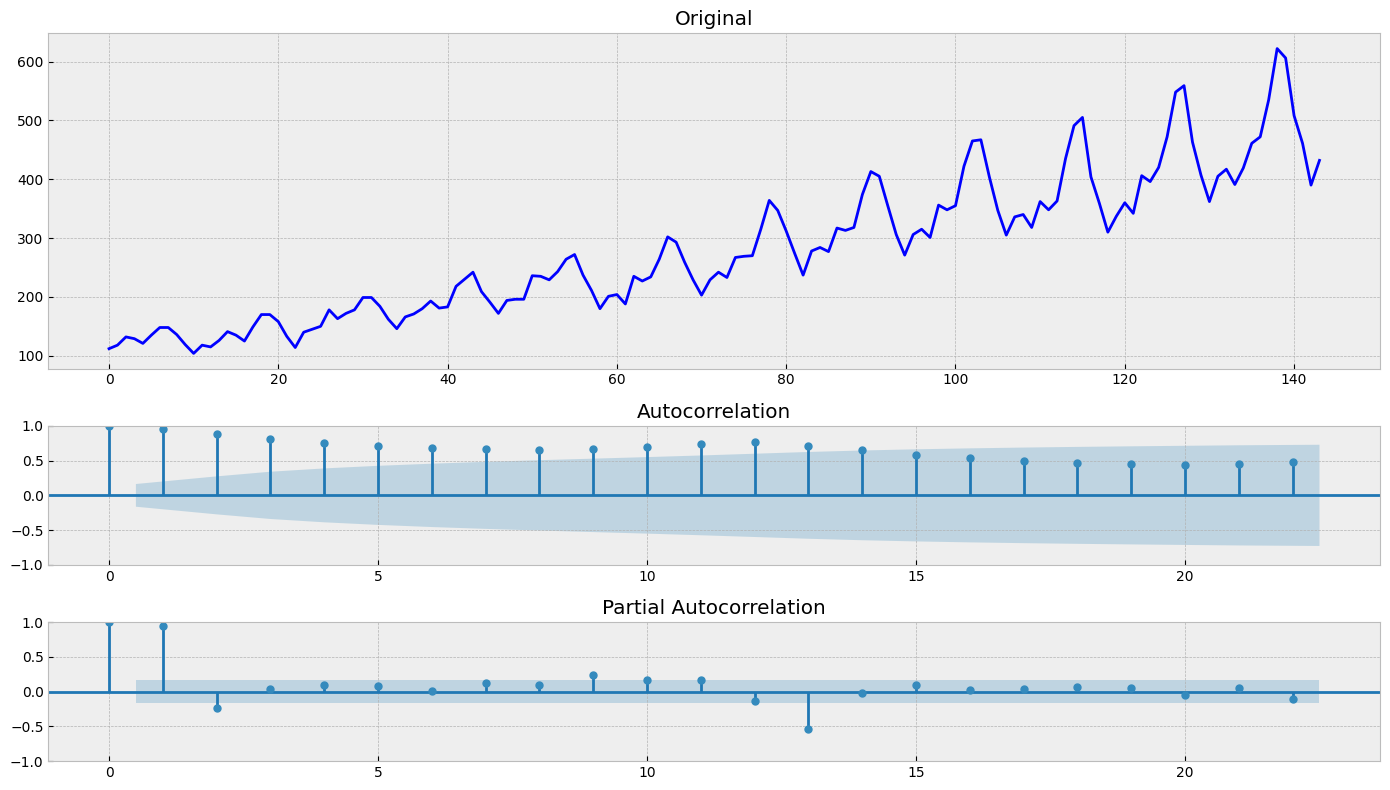

In [146]:
tsplot(series)

Избавляемся от дисперсии

In [147]:
series = boxcox(series, 0)

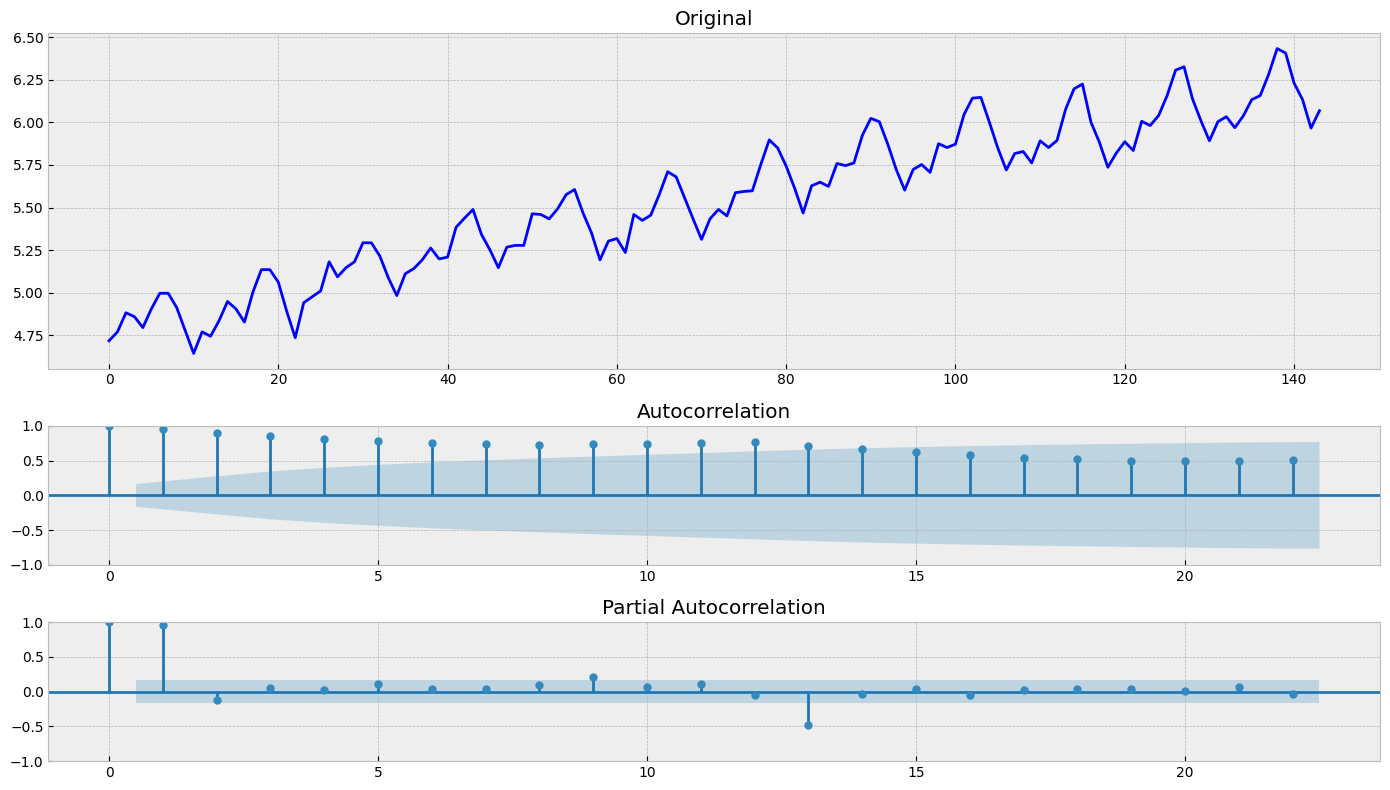

In [32]:
tsplot(series)

Избавляемся от тренда

In [148]:
series = np.diff(series, 1)

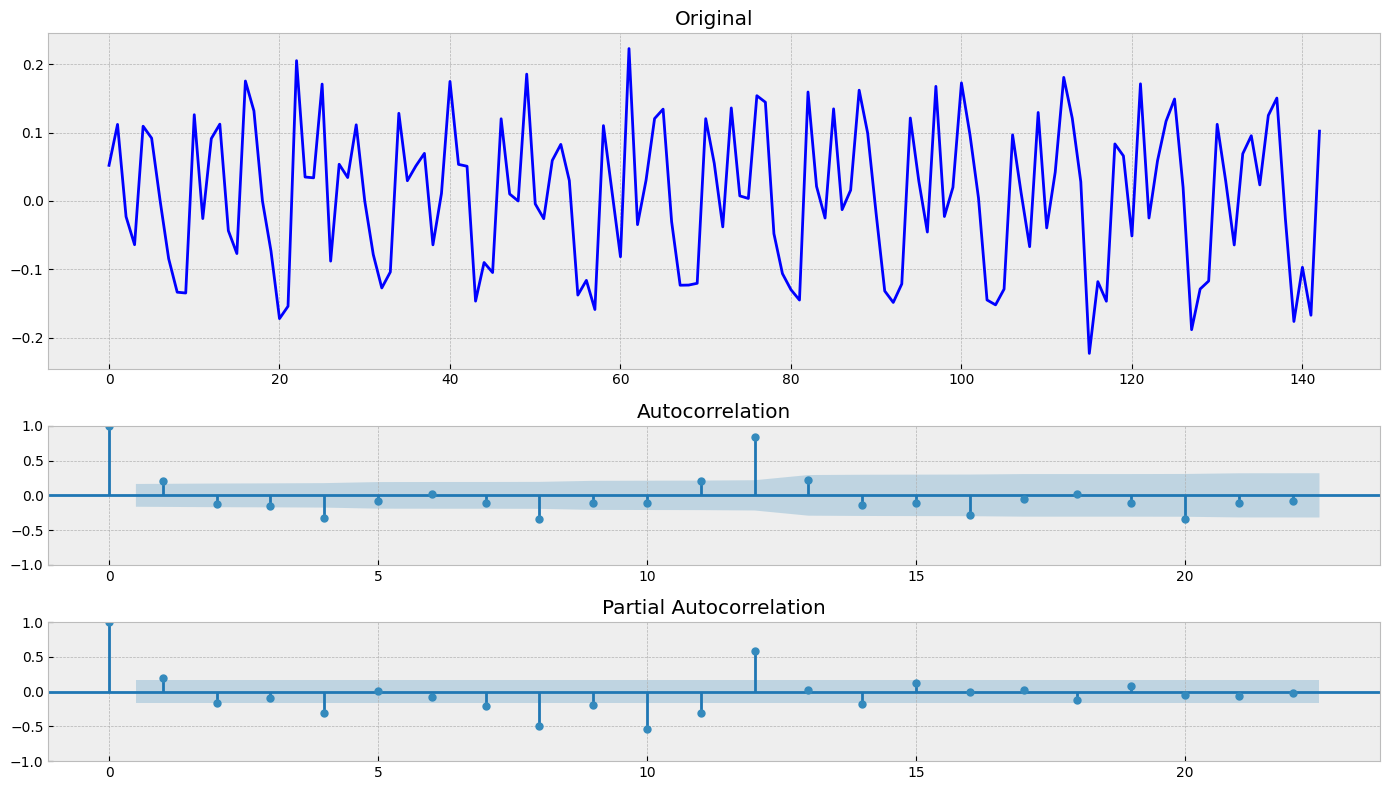

In [149]:
tsplot(series)

Убираем сезонность

In [150]:
series = series[12:] - series[:-12]

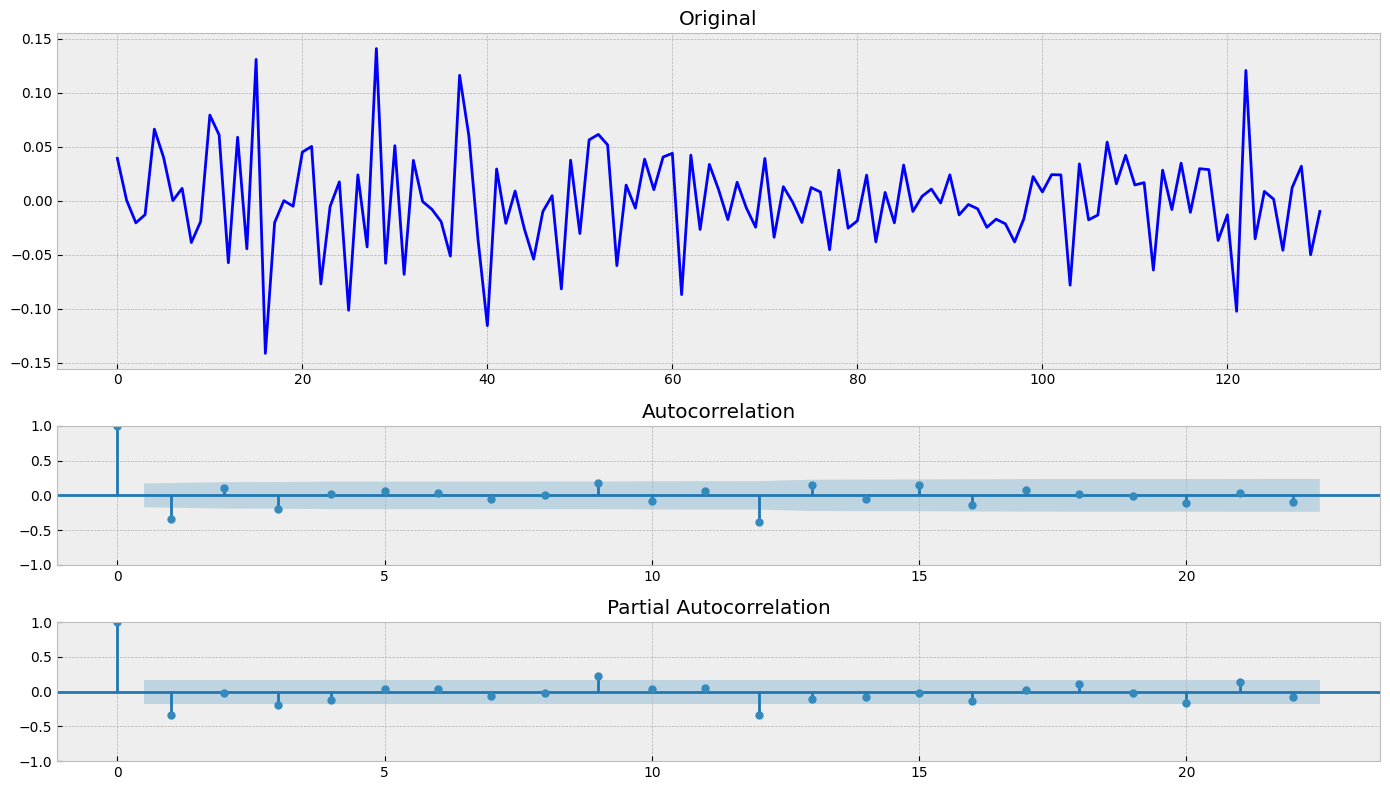

In [151]:
tsplot(series)

In [152]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


В результате произведеных преобразований мы привели ряд к стационарному, что видно по результатам p-value 0.991880 на начальном этапе и p-value 0.000249 после преобразований, а так же графику автокорреляции, где значния расположены в пределах доверительного интервала.

Monthly Boston armed robberies

In [153]:
test_stationarity(all_series["Monthly Boston armed robberies"])

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


In [154]:
series1 = pd.read_csv("/content/drive/MyDrive/Знакомство с временными рядами/monthly-boston-armed-robberies-j.csv")['Count']

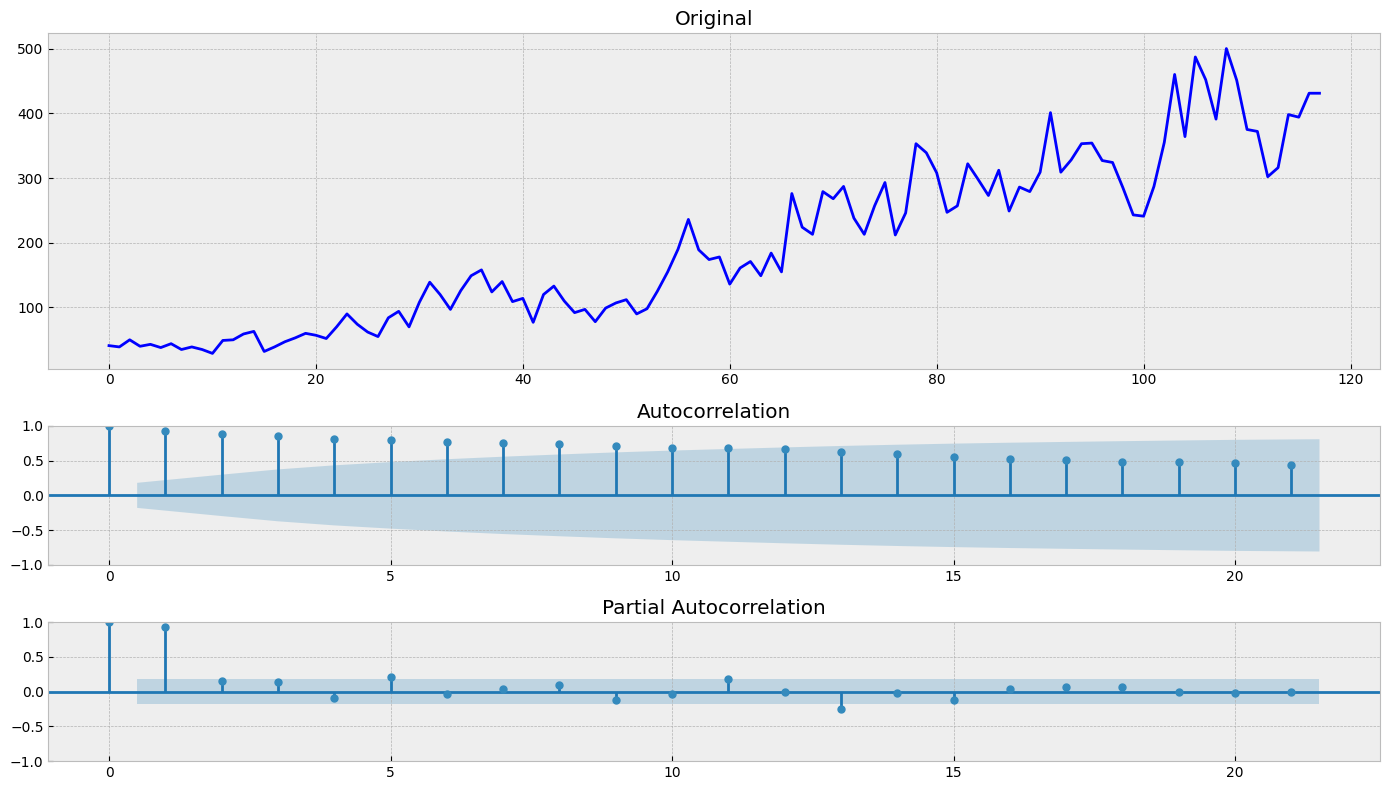

In [155]:
tsplot(series1)

Избавимся от тренда

In [156]:
series1 = np.diff(series1, 1)

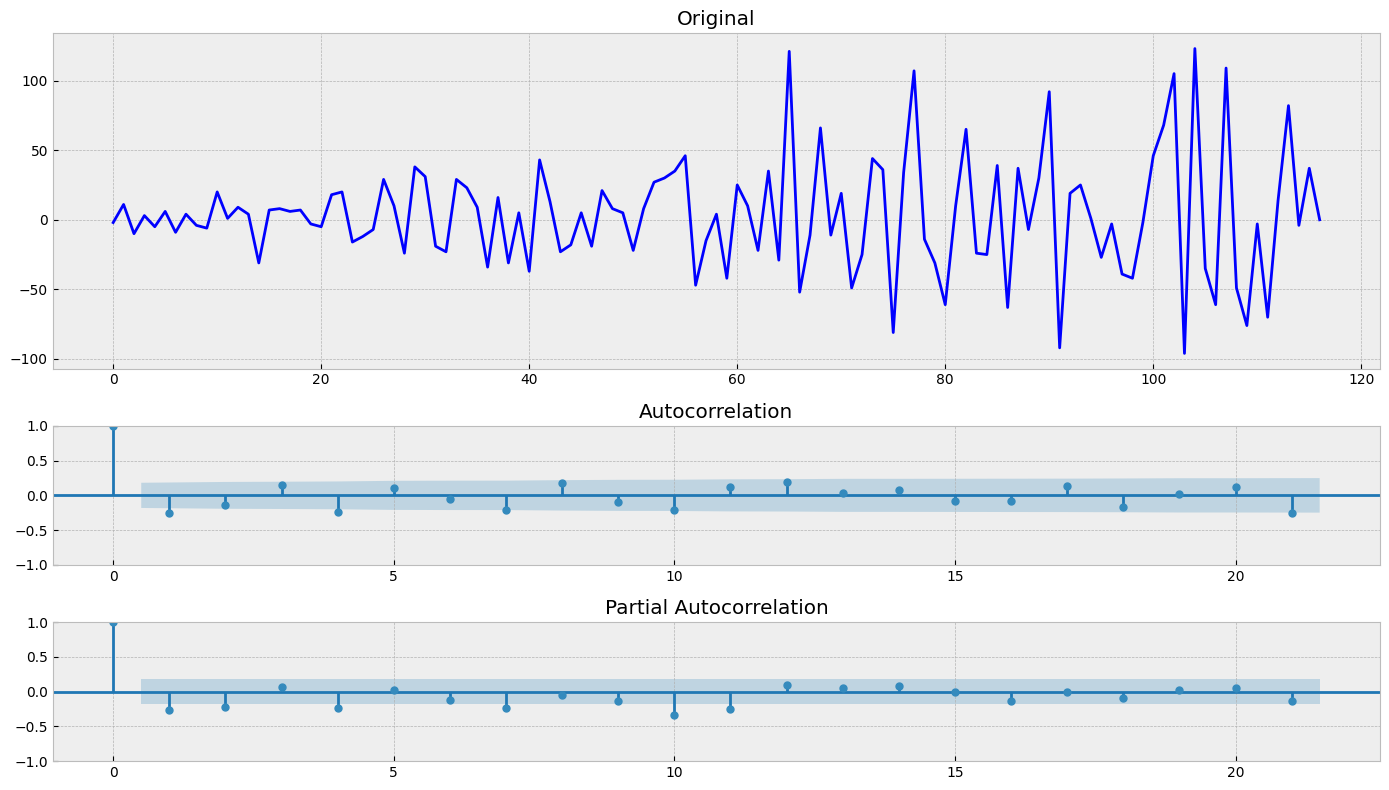

In [157]:
tsplot(series1)

In [158]:
test_stationarity(series1)

Results of Dickey-Fuller Test:
Test Statistic                -7.428564e+00
p-value                        6.450795e-11
#Lags Used                     1.000000e+01
Number of Observations Used    1.060000e+02
Critical Value (1%)           -3.493602e+00
Critical Value (5%)           -2.889217e+00
Critical Value (10%)          -2.581533e+00
dtype: float64


В результате дифференцирования мы привели ряд к стационарному, что видно по результатам p-value 0.994278 на начальном этапе и p-value 6.450795e-11 после преобразований, а так же графику автокорреляции, где значния расположены в пределах доверительного интервала.

monthly_sales_of_company

In [159]:
test_stationarity(all_series["Monthly sales of company x"])

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


In [160]:
series2 = pd.read_csv("/content/drive/MyDrive/Знакомство с временными рядами/monthly-sales-of-company-x-jan-6.csv")['Count']

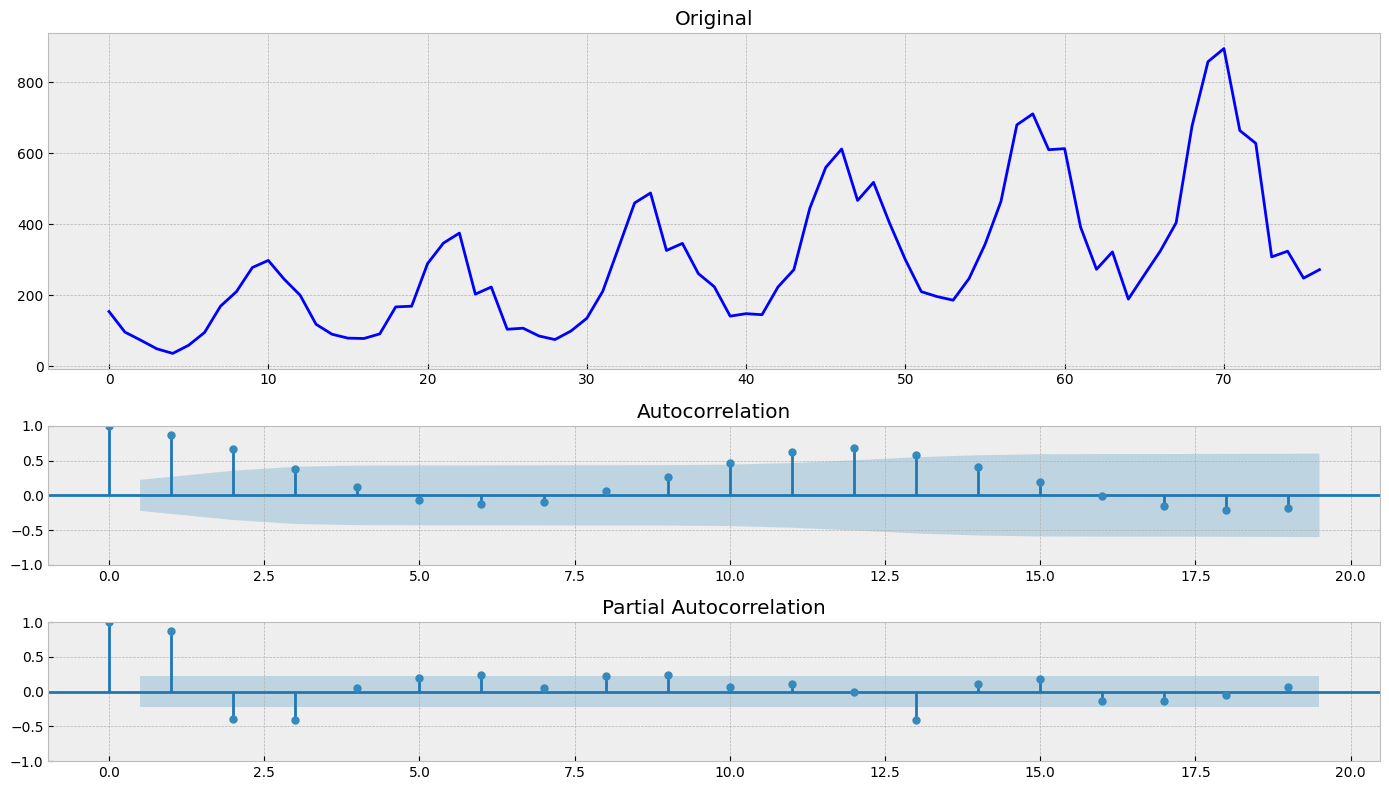

In [161]:
tsplot(series2)

Избавимся от дисперсии

In [162]:
series2 = boxcox(series2, 0)

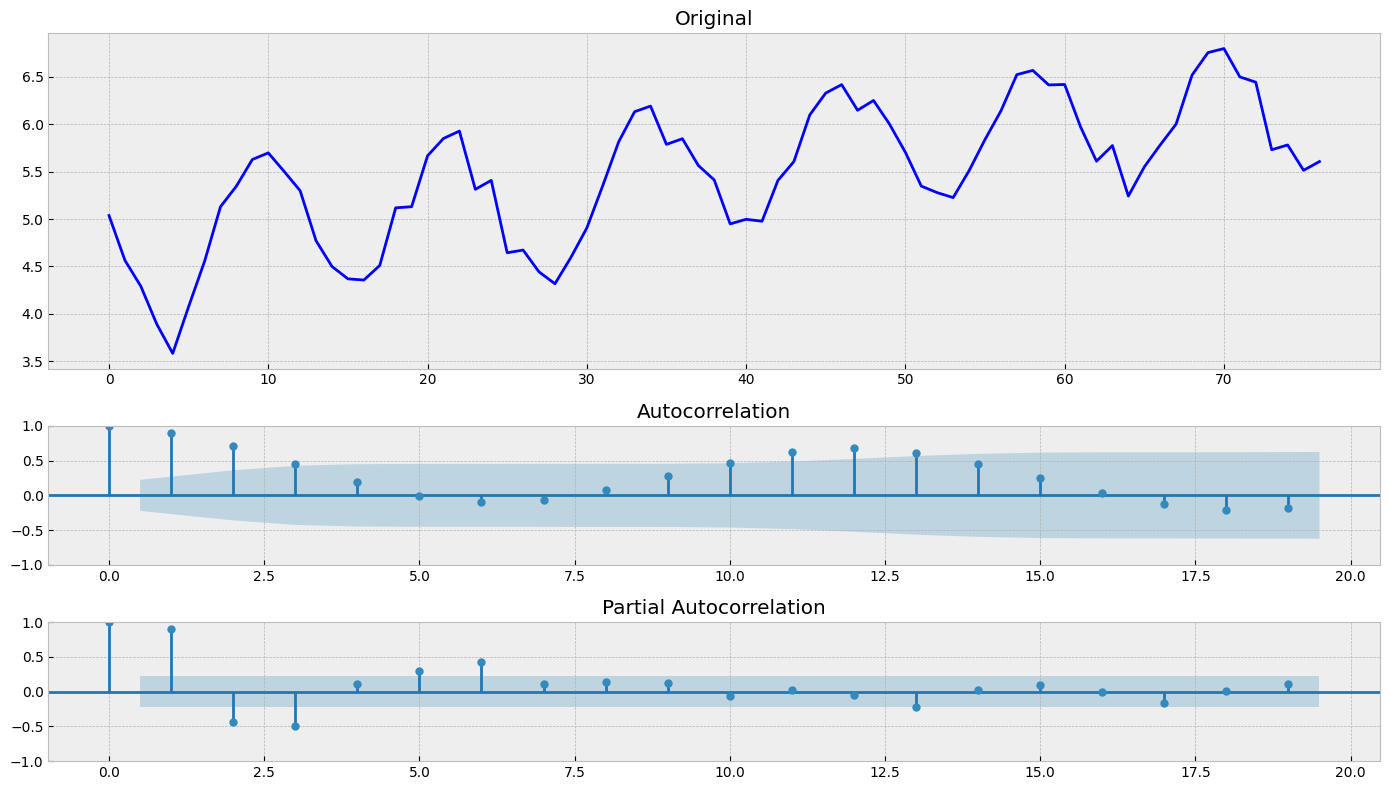

In [163]:
tsplot(series2)

Избавимся от тренда

In [164]:
series2 = np.diff(series2, 1)

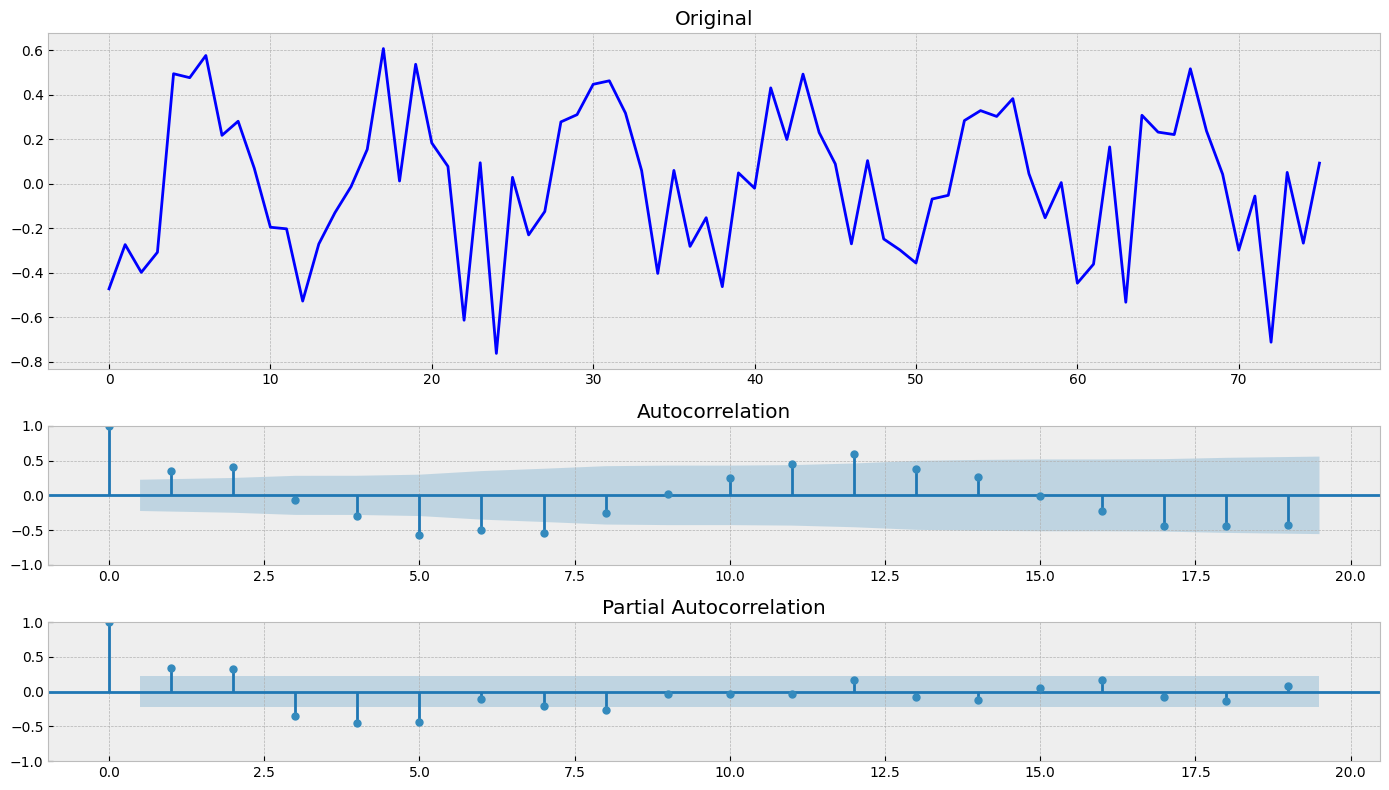

In [165]:
tsplot(series2)

In [171]:
test_stationarity(series2)

Results of Dickey-Fuller Test:
Test Statistic                -8.688279e+00
p-value                        4.106342e-14
#Lags Used                     1.200000e+01
Number of Observations Used    6.000000e+01
Critical Value (1%)           -3.544369e+00
Critical Value (5%)           -2.911073e+00
Critical Value (10%)          -2.593190e+00
dtype: float64


В результате преобразований мы привели ряд к стационарному, что видно по результатам p-value 0.994278 на начальном этапе и p-value 4.106342e-14 после преобразований, а так же графику автокорреляции, где значния расположены в пределах доверительного интервала.

  Mean monthly air temperature

In [196]:
test_stationarity(all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"])

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


In [197]:
series3=pd.read_csv("/content/drive/MyDrive/Знакомство с временными рядами/mean-monthly-air-temperature-deg.csv")['Deg']

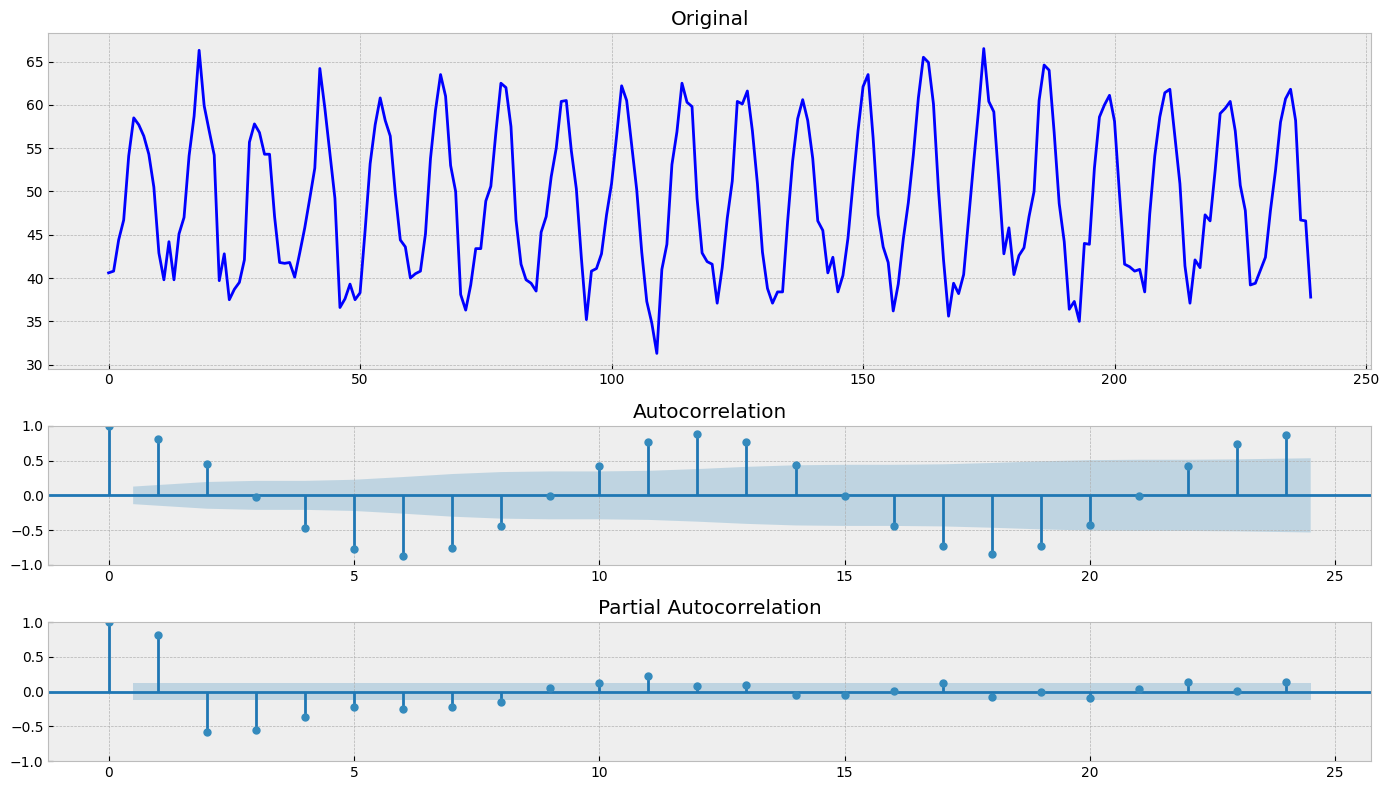

In [198]:
tsplot(series3)

Избавимся от сезонности

In [205]:
series3 = series3[12:] - series3[:-12]

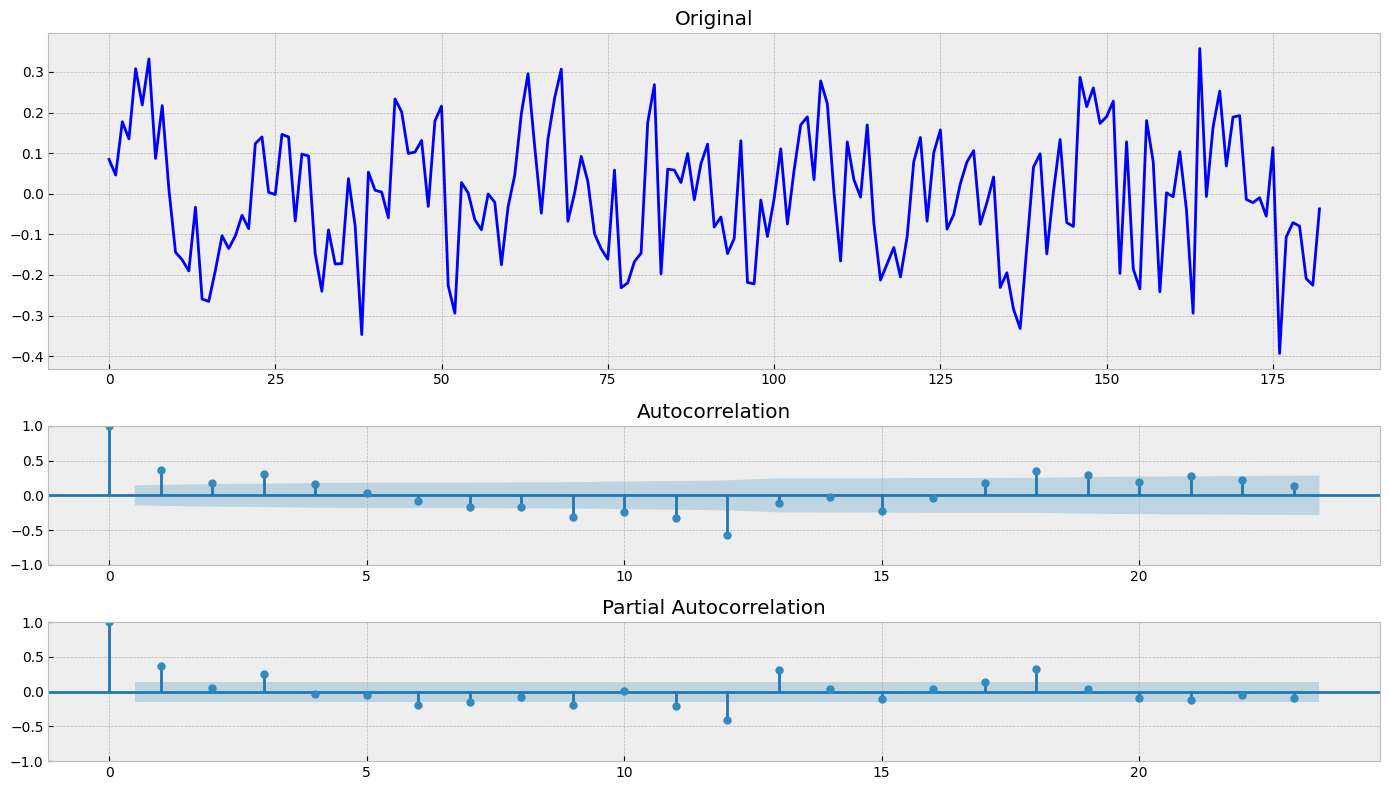

In [206]:
tsplot(series3)

In [207]:
test_stationarity(series3)

Results of Dickey-Fuller Test:
Test Statistic                  -5.623163
p-value                          0.000001
#Lags Used                      12.000000
Number of Observations Used    170.000000
Critical Value (1%)             -3.469413
Critical Value (5%)             -2.878696
Critical Value (10%)            -2.575917
dtype: float64


В результате преобразований мы привели ряд к стационарному, что видно по результатам p-value 0.016989 на начальном этапе и p-value 0.000001 после преобразований, а так же графику автокорреляции, где значния расположены почти в пределах доверительного интервала.

dowjones_closing

In [131]:
test_stationarity(all_series["Weekly closings of the Dow-Jones industrial average"])

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


In [132]:
series4 = pd.read_csv("/content/drive/MyDrive/Знакомство с временными рядами/weekly-closings-of-the-dowjones-.csv")['Close']

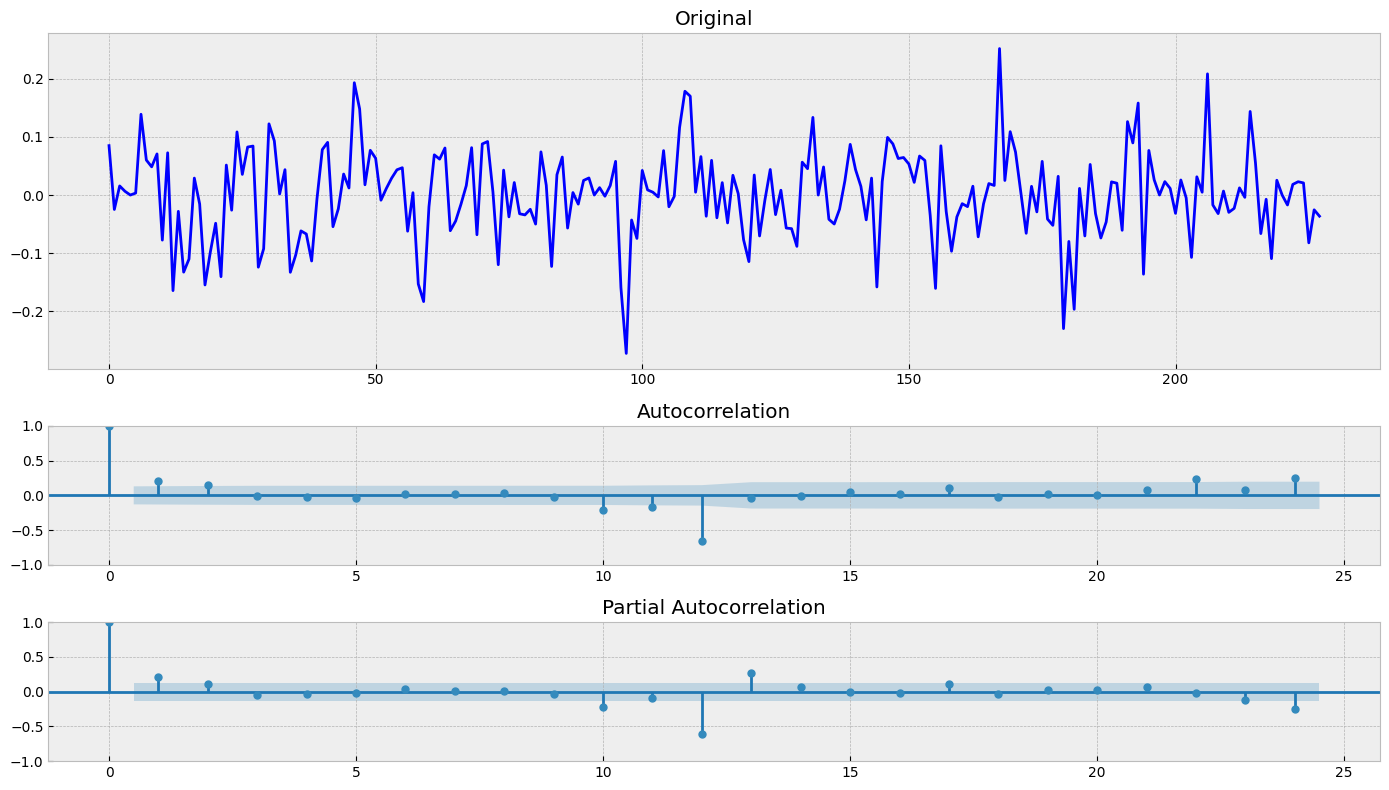

In [134]:
tsplot(series3)

In [135]:
series4 = np.diff(series4, 1)

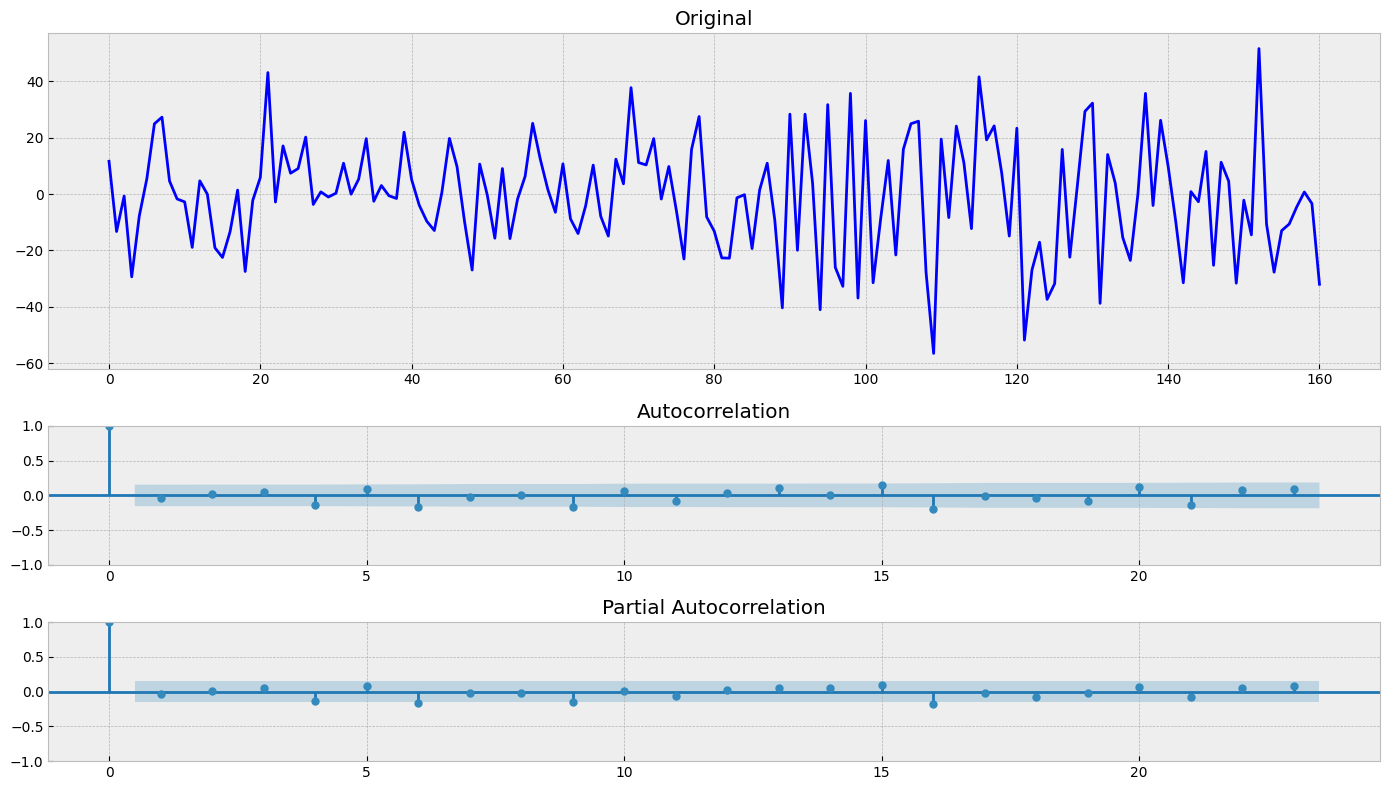

In [136]:
tsplot(series4)

In [137]:
test_stationarity(series4)

Results of Dickey-Fuller Test:
Test Statistic                -1.302521e+01
p-value                        2.407586e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


В результате преобразований мы привели ряд к стационарному, что видно по результатам p-value 0.622455 на начальном этапе и p-value 2.407586e-24 после преобразований, а так же графику автокорреляции, где значния расположены  в пределах доверительного интервала.

female_births


In [138]:
test_stationarity(all_series["Daily total female births in California"])

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


In [140]:
series5 = pd.read_csv("/content/drive/MyDrive/Знакомство с временными рядами/daily-total-female-births-in-cal.csv")['Count']

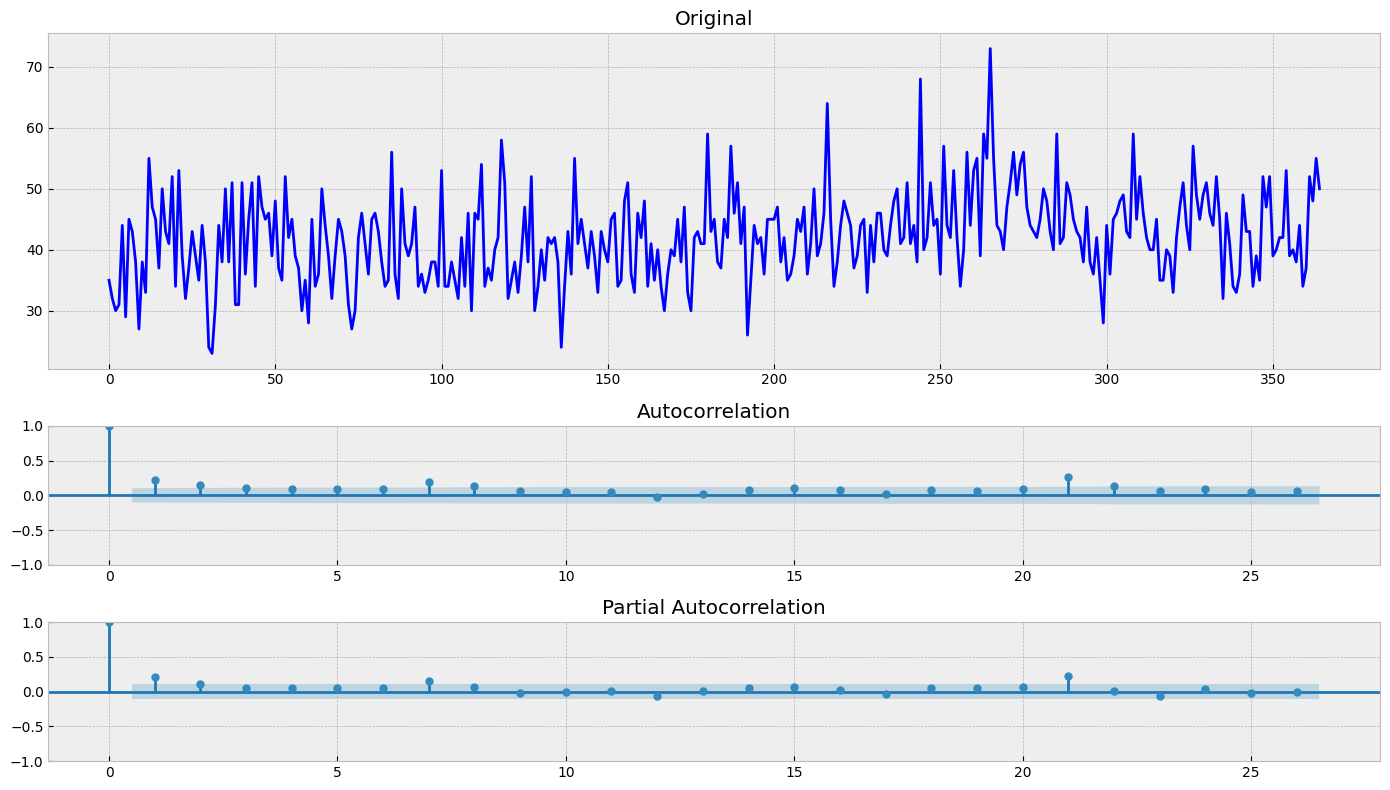

In [141]:
tsplot(series5)

Ряд стационарный, что видно по результатам p-value 0.000052, а так же графику автокорреляции, где значния расположены в пределах доверительного интервала.